## Урок 3. Кейс 1. Работа с признаками и селекция

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
import itertools

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
def test_ts_stationarity(ts):
    ma = ts.rolling(12).mean()
    std = ts.rolling(12).std()
    plt.figure(figsize=(12, 10))
    orig = plt.plot(ts, color='blue', label='Original')
    mean = plt.plot(ma, color='red', label='Rolling mean')
    std = plt.plot(std, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title("Rolling mean & std")
    plt.show()
    #adf test
    print("Results of DF test:")
    dftest = adfuller(ts, autolag='AIC')
    df_test = pd.DataFrame(dftest[:-1])
    df_test.index = ['Test statistic', 'p_value', 'lags', 'num observations', 'critical values']
    print(df_test)

#### 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по 1 месяцу.

In [99]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [100]:
m_data = data.resample('M').mean()
m_data.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


#### 2. Подберите параметры модели SARIMAX для этого ряда.

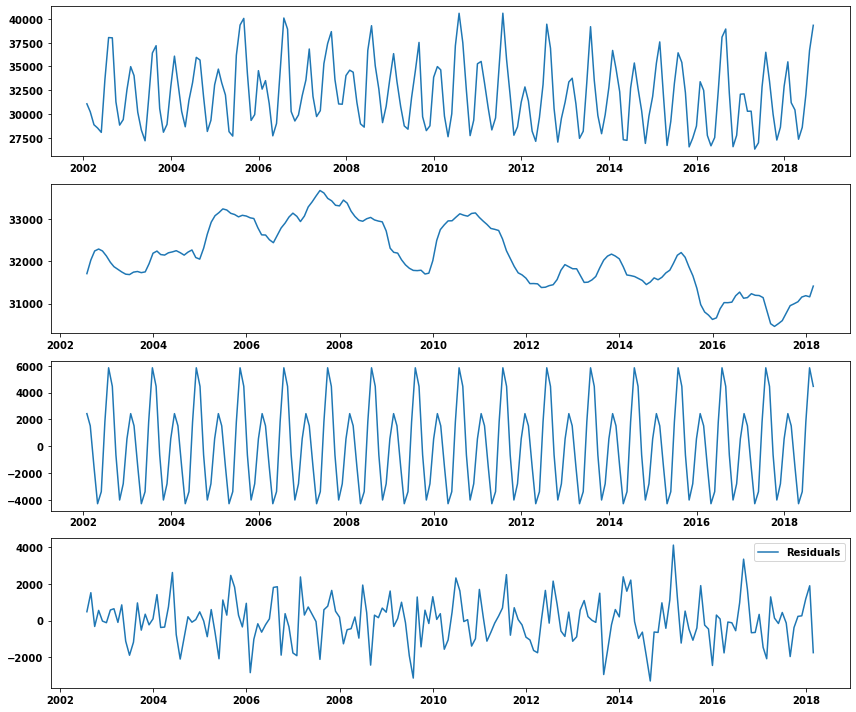

In [101]:
dec = seasonal_decompose(m_data['PJME_MW'])
trend = dec.trend
seasonal = dec.seasonal
residuals = dec.resid

plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(m_data['PJME_MW'], label='Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [105]:
# Отмечаем сезонность в 12 месяцев

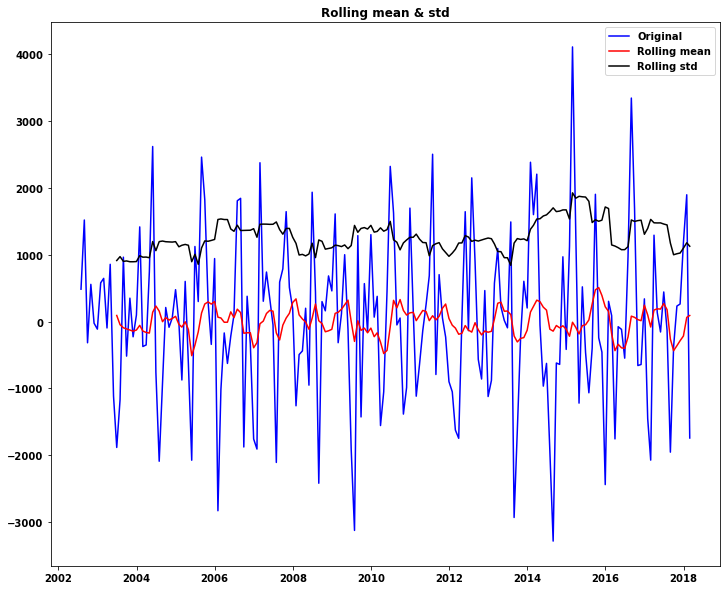

Results of DF test:
                                                                  0
Test statistic                                             -7.62394
p_value                                                 2.09272e-11
lags                                                             14
num observations                                                173
critical values   {'1%': -3.4687256239864017, '5%': -2.878396137...


In [106]:
test_ts_stationarity(residuals.dropna())

In [107]:
# Остатки стационарны

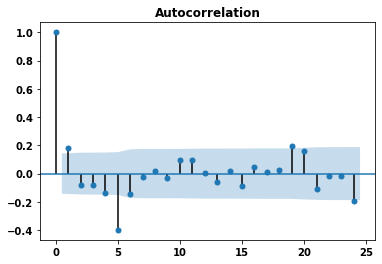

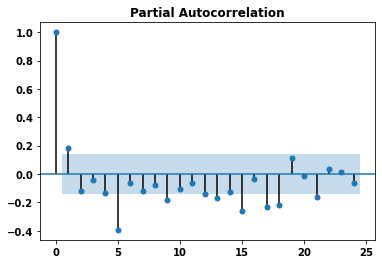

In [108]:
# Построим ACF и PACF
sm.graphics.tsa.plot_acf(residuals.dropna(), lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(residuals.dropna(), lags=24)
plt.show()

In [109]:
# Определим p, d и q в диапазоне 0-2
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 0) x (0, 0, 0, 12)
SARIMAX: (0, 1, 0) x (0, 0, 1, 12)


In [110]:
warnings.filterwarnings("ignore") # отключает предупреждения

min_aic = float('inf')
param_for_min = []
param_seasonal_for_min = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(m_data['PJME_MW'].values[:-10],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            if results.aic < min_aic:
                min_aic = results.aic
                param_for_min = param
                param_seasonal_for_min = param_seasonal
                
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
print(f'Параметры для минимального AIC = {min_aic}: pdq = {param_for_min}, seasonal_pdq = {param_seasonal_for_min}')

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:4463.051035665778
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:4060.74446864495
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:3189.1047595620007
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2962.9009172045553
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:3211.259039000882
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:3191.049774025445
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2972.189893609415
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2955.247980747777
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:4304.9583024618
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:3998.1029368733525
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:3148.0603986913866
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2924.3934535035
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:4026.025783212929
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:3144.2194754934167
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2948.9722364988666
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2915.6661943842964
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:3602.775179645175
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:3305.832270119741
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:3218.9648

In [111]:
#для построения модели используем все данные, кроме 10-и последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(m_data['PJME_MW'].values[:-10],
                                order=param_for_min,
                                seasonal_order=param_seasonal_for_min,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 2878.450810819297


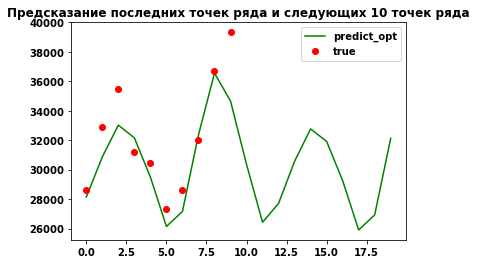

In [114]:
# Построим графики
plt.plot(results_opt.forecast(20), 'g', label='predict_opt' )
plt.plot(m_data['PJME_MW'].values[-10:], 'or', label='true')
plt.title('Предсказание последних точек ряда и следующих 10 точек ряда')
plt.legend()
plt.show()

In [115]:
print(results_opt.summary().tables[0],results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  190
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1435.225
Date:                            Tue, 14 Jul 2020   AIC                           2878.451
Time:                                    01:21:12   BIC                           2890.826
Sample:                                         0   HQIC                          2883.475
                                            - 190                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

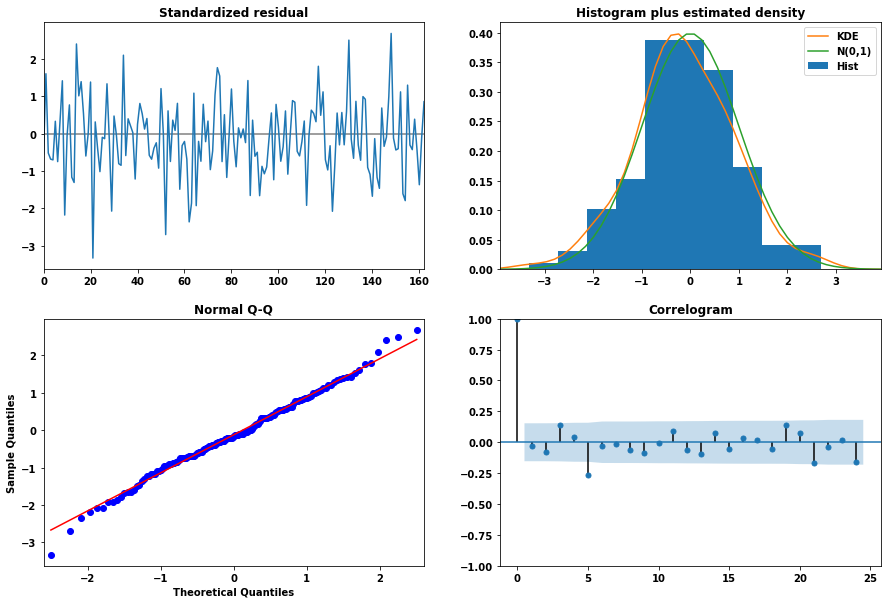

In [125]:
# Посмотрим на остатки
results_opt.plot_diagnostics(figsize=(15, 10), lags=24)
plt.show()

#### 3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Месячные исходные данные более грубые, в них меньше нюансов чем в недельных, поэтому такие данные моделировать проще. 
Соответственно месячная модель получилась более точная чем недельная.

#### 4. Возмите вариант 1 или 2
Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)<br>
Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

In [3]:
# Вариант 2)
data = pd.read_csv('covid_19_data.csv', index_col=[1], parse_dates=[1])
data.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
data_ru = data[data['Country/Region']=='Russia'] 
d_data = data_ru.resample('D').mean()
data_log = np.log1p(d_data)

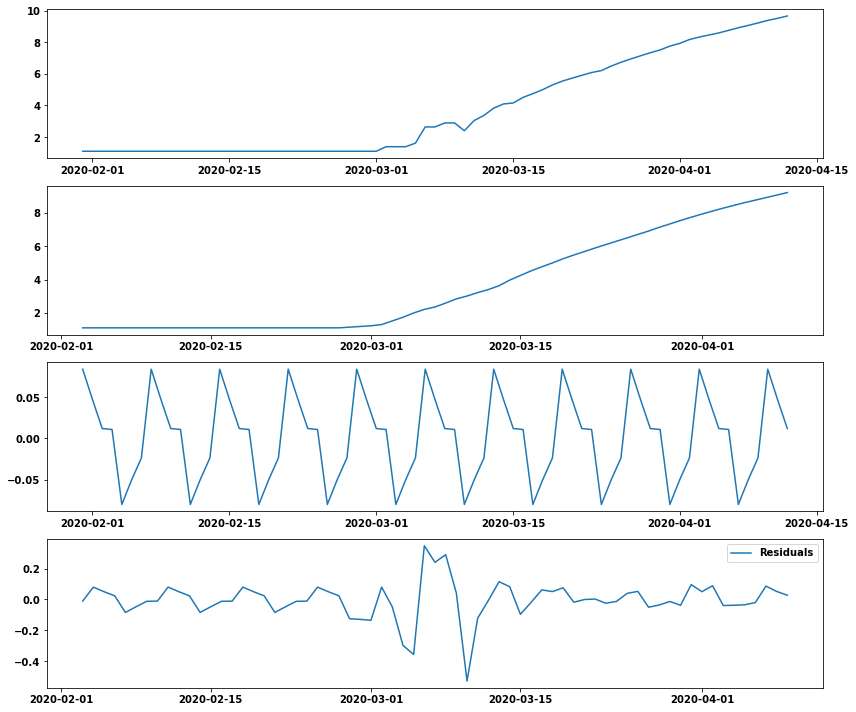

In [5]:
dec = seasonal_decompose(data_log['Confirmed'])
trend = dec.trend
seasonal = dec.seasonal
residuals = dec.resid

plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(data_log['Confirmed'], label='Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [6]:
# Отмечаем сезонность в 7 дней

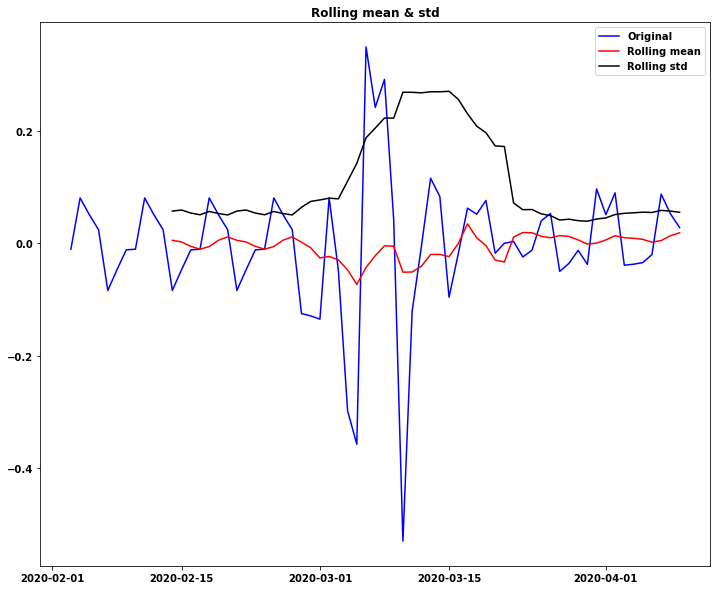

Results of DF test:
                                                                  0
Test statistic                                             -4.07953
p_value                                                  0.00104679
lags                                                              4
num observations                                                 62
critical values   {'1%': -3.540522678829176, '5%': -2.9094272025...


In [7]:
test_ts_stationarity(residuals.dropna())

In [8]:
# Остатки стационарны

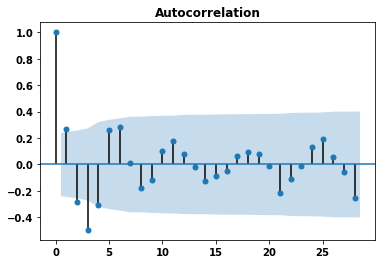

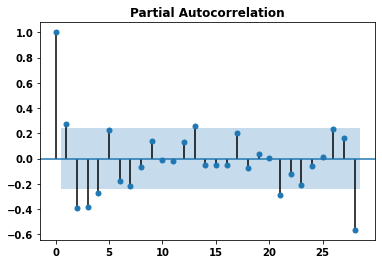

In [9]:
# Построим ACF и PACF
sm.graphics.tsa.plot_acf(residuals.dropna(), lags=28)
plt.show()

sm.graphics.tsa.plot_pacf(residuals.dropna(), lags=28)
plt.show()

#### 5. Оцените результат моделирования

In [10]:
# Определим p, d и q
p = range(0, 2)
d = range(1, 2)
q = range(0, 2)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q
p = range(1, 6)
d = range(1, 2)
q = range(1, 6)

seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (1, 1, 2, 7)
SARIMAX: (0, 1, 1) x (1, 1, 1, 7)
SARIMAX: (1, 1, 0) x (1, 1, 1, 7)
SARIMAX: (1, 1, 0) x (1, 1, 2, 7)


In [11]:
warnings.filterwarnings("ignore") # отключает предупреждения

min_aic = float('inf')
param_for_min = []
param_seasonal_for_min = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_log['Confirmed'].values[:-5],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            if results.aic < min_aic:
                min_aic = results.aic
                param_for_min = param
                param_seasonal_for_min = param_seasonal
                
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
print(f'Параметры для минимального AIC = {min_aic}: pdq = {param_for_min}, seasonal_pdq = {param_seasonal_for_min}')

ARIMA(0, 1, 0)x(1, 1, 1, 7) - AIC:-1.991603502162011
ARIMA(0, 1, 0)x(1, 1, 2, 7) - AIC:4.894136702366979
ARIMA(0, 1, 0)x(1, 1, 3, 7) - AIC:9.76400090211912
ARIMA(0, 1, 0)x(1, 1, 4, 7) - AIC:-1.6733729068877512
ARIMA(0, 1, 0)x(1, 1, 5, 7) - AIC:-6.077898706602625
ARIMA(0, 1, 0)x(2, 1, 1, 7) - AIC:4.788777702875796
ARIMA(0, 1, 0)x(2, 1, 2, 7) - AIC:4.455297000177421
ARIMA(0, 1, 0)x(2, 1, 3, 7) - AIC:11.930437119808282
ARIMA(0, 1, 0)x(2, 1, 4, 7) - AIC:-1.6626383981851465
ARIMA(0, 1, 0)x(2, 1, 5, 7) - AIC:-14.438238980517045
ARIMA(0, 1, 0)x(3, 1, 1, 7) - AIC:12.605819644688172
ARIMA(0, 1, 0)x(3, 1, 2, 7) - AIC:5.969287542664731
ARIMA(0, 1, 0)x(3, 1, 3, 7) - AIC:5.900001911891595
ARIMA(0, 1, 0)x(3, 1, 4, 7) - AIC:-1.4633906071271063
ARIMA(0, 1, 0)x(3, 1, 5, 7) - AIC:-12.832185632262128
ARIMA(0, 1, 0)x(4, 1, 1, 7) - AIC:-1.0409460076646742
ARIMA(0, 1, 0)x(4, 1, 2, 7) - AIC:-2.6003672481028204
ARIMA(0, 1, 0)x(4, 1, 3, 7) - AIC:-0.8133299686451814
ARIMA(0, 1, 0)x(4, 1, 4, 7) - AIC:6.352875698

In [12]:
#для построения модели используем все данные, кроме 5-и последних дней (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_log['Confirmed'].values[:-5],
                                order=param_for_min,
                                seasonal_order=param_seasonal_for_min,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} -57.58816299945987


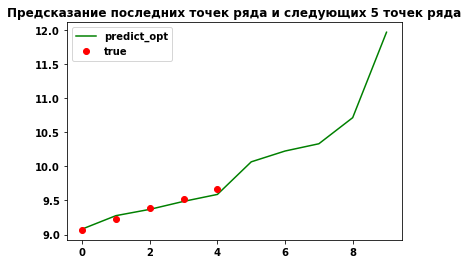

In [13]:
# Построим графики
pred_dynamic_opt = results_opt.forecast(10)
plt.plot(pred_dynamic_opt, 'g', label='predict_opt' )
plt.plot(data_log['Confirmed'].values[-5:], 'or', label='true')
plt.title('Предсказание последних точек ряда и следующих 5 точек ряда')
plt.legend()
plt.show()

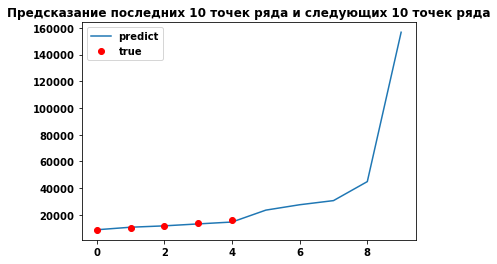

In [14]:
# Уберём логарифмирование
plt.plot(np.exp(pred_dynamic_opt) - 1, label='predict' )
plt.plot(d_data['Confirmed'].values[-5:],'or',label='true')
plt.title('Предсказание последних 10 точек ряда и следующих 10 точек ряда')
plt.legend()
plt.show()

In [15]:
print(results_opt.summary().tables[0],results.summary().tables[1])

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                   68
Model:             SARIMAX(1, 1, 1)x(5, 1, [1, 2], 7)   Log Likelihood                  38.794
Date:                                Tue, 14 Jul 2020   AIC                            -57.588
Time:                                        02:33:06   BIC                            -45.808
Sample:                                             0   HQIC                           -54.463
                                                 - 68                                         
Covariance Type:                                  opg                                         
============================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025

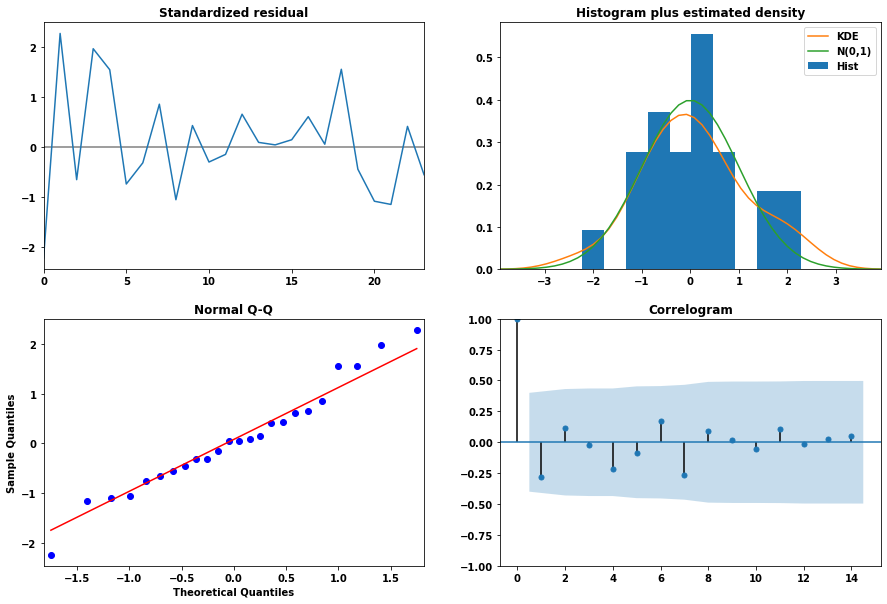

In [18]:
# Посмотрим на остатки
results_opt.plot_diagnostics(figsize=(15, 10), lags=14)
plt.show()

#### 6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

Лучше всего работают ряды которые хорошо коррелируют сами с собой, при этом допускается наличие тренда и сезонности